# Generate latent embeddings

In [1]:
from pathlib import Path
import pickle
import numpy as np
import torch
from typing import List
import pandas as pd
from sklearn.discriminant_analysis import StandardScaler
from sklearn.manifold import TSNE

from utils.vis_related import plot_one_label


def load_filter_tabular_data(subj_id, tabular_path, selected_col_names: List[str] = None):
    """ Sort the tabular data based on subject ids so that the order of data is the same as for the subject order
    in imaging paths """
    
    tab_csv = pd.read_csv(tabular_path, index_col=None)
    imaging_id_list = list(subj_id)
    filtered_tab = tab_csv[tab_csv["eid"].isin(imaging_id_list)]
    ordered_tab = filtered_tab.set_index("eid").reindex(imaging_id_list).reset_index()
    if selected_col_names != None:
        ordered_tab = ordered_tab[selected_col_names]
    else:
        ordered_tab = ordered_tab.drop("eid", axis=1)
    
    return ordered_tab

N_COMPONENTS = 2
N_TMP = 10
SCALE_MAP = True
SAVE = True

embeddings_path = "results/embeddings/embeddings_c6.npz"
subject_features_path = "../datasets/data_files/tabular_files/cardiac_features_668815_clean.csv"
selected_col_names = ["Age when attended assessment centre-2.0", "LVEDV (mL)"]
plot_name = "embeddings_c6"

/u/home/zyun/miniconda3/envs/kmae_39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The number of temporal patches is 10


/tmp/ipykernel_275645/733165251.py:17: DtypeWarning: Columns (347,351,352,353,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148

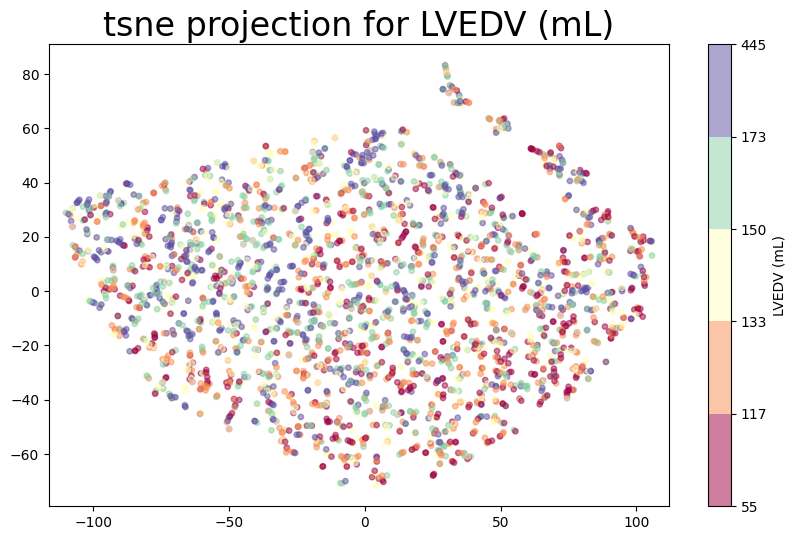

In [3]:
embeddings = np.load(embeddings_path)
cls_token = embeddings["cls_token"]
all_token = embeddings["all_token"]
subj_id = embeddings["subj_id"]
assert all_token.shape[1] == N_TMP
print(f"The number of temporal patches is {N_TMP}")
features = load_filter_tabular_data(subj_id, subject_features_path, selected_col_names)

# Generate t-SNE maps
reducer = TSNE(N_COMPONENTS, perplexity=5, learning_rate="auto")
if SCALE_MAP:
    cls_token = StandardScaler().fit_transform(cls_token)
map_cls = reducer.fit_transform(cls_token)

label_name = selected_col_names[1]
fig = plot_one_label(ordered_data=features, map=map_cls, map_type="tsne", label_name=label_name, dim=2)
if SAVE:
    fig.savefig(f"{plot_name}_{label_name}.png")